# **Project Name**    -  **FedEx Logistics: Supply Chain & Delivery Performance Analysis**




🗂️ Project Type – Exploratory Data Analysis (EDA) Capstone Project
🤝 My Contribution – ROSHAN SAH,
Selected and cleaned real-world logistics dataset (FedEx SCMS Delivery History).

Formulated business hypotheses around shipment delays, modes, INCO terms, and insurance costs.

Performed univariate, bivariate, and multivariate analysis using Python (Pandas, NumPy, Seaborn, Plotly).

Developed structured visualizations with insight-based commentary.

Ensured deployment-ready, modular, and well-commented codebase.

Presented findings via video demonstration highlighting actionable business insights.



# 📦 **Data**

This section focuses on loading and understanding the structure of the dataset used for analyzing FedEx Logistics' supply chain performance. We will cover the following subsections:

---


### 🔹 1. Importing Libraries & Loading Dataset
We'll load the necessary Python libraries and read the dataset into a Pandas DataFrame.


In [28]:
# 📌 Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import warnings

# Ignore unnecessary warnings
warnings.filterwarnings("ignore")

# 📌 Load Dataset
file_path = '/content/SCMS_Delivery_History_Dataset (1).csv'  # Update if needed
df = pd.read_csv(file_path)

# ✅ Confirm successful load
print("✅ Dataset successfully loaded!")


✅ Dataset successfully loaded!


### 🔹 2. Dataset Dimensions & Preview
We'll check the shape (rows × columns) and look at the first few rows to get an initial feel of the data.


In [29]:
# 📌 Dataset Dimensions
print(f"🔎 Number of Rows: {df.shape[0]}")
print(f"🔎 Number of Columns: {df.shape[1]}")

# 📌 Display first 5 rows of the dataset
df.head()


🔎 Number of Rows: 10324
🔎 Number of Columns: 33


,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN


### 🔹 3. Data Types & Basic Info
Understanding the type of data (numerical, categorical, datetime) helps determine cleaning and transformation steps.


In [30]:
# 📌 Check basic info and data types
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            10324 non-null  int64  
 1   Project Code                  10324 non-null  object 
 2   PQ #                          10324 non-null  object 
 3   PO / SO #                     10324 non-null  object 
 4   ASN/DN #                      10324 non-null  object 
 5   Country                       10324 non-null  object 
 6   Managed By                    10324 non-null  object 
 7   Fulfill Via                   10324 non-null  object 
 8   Vendor INCO Term              10324 non-null  object 
 9   Shipment Mode                 9964 non-null   object 
 10  PQ First Sent to Client Date  10324 non-null  object 
 11  PO Sent to Vendor Date        10324 non-null  object 
 12  Scheduled Delivery Date       10324 non-null  object 
 13  D

### 🔹 4. Missing Values
We'll check for missing/null values and plan how to handle them appropriately.

---

In [31]:
# 📌 Check for missing/null values in each column
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100

# 📊 Combine into a summary DataFrame
missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Missing Percentage (%)': missing_percent.round(2)
})

# 🔎 Display only columns with missing data
missing_df = missing_df[missing_df['Missing Values'] > 0].sort_values(by='Missing Percentage (%)', ascending=False)
missing_df


,Missing Values,Missing Percentage (%)
Dosage,1736,16.82
Shipment Mode,360,3.49
Line Item Insurance (USD),287,2.78


### 🔹 5. Summary Statistics
We'll compute descriptive statistics to understand the distribution and central tendencies of numeric columns.

--

In [32]:
# 📌 Summary statistics for numerical columns
df.describe().T


,count,mean,std,min,25%,50%,75%,max
ID,10324.0,51098.968229,31944.332496,1.0,12795.7500,57540.500,83648.2500,86823.00
Unit of Measure (Per Pack),10324.0,77.990895,76.579764,1.0,30.0000,60.000,90.0000,1000.00
Line Item Quantity,10324.0,18332.534870,40035.302961,1.0,408.0000,3000.000,17039.7500,619999.00
Line Item Value,10324.0,157650.567347,345292.066979,0.0,4314.5925,30471.465,166447.1400,5951990.40
Pack Price,10324.0,21.910241,45.609223,0.0,4.1200,9.300,23.5925,1345.64
Unit Price,10324.0,0.611701,3.275808,0.0,0.0800,0.160,0.4700,238.65
Line Item Insurance (USD),10037.0,240.117626,500.190568,0.0,6.5100,47.040,252.4000,7708.44


### 🔹 6. Data Dictionary (Column Descriptions)

This section explains the meaning of each column in the dataset and its relevance to logistics and delivery performance:

| Column Name                        | Description |
|-----------------------------------|-------------|
| `ID`                              | Unique identifier for each shipment record. |
| `Project Code`                    | Code representing the project or operation. |
| `PQ #`                            | Pre-qualification number assigned for vendor/product. |
| `PO / SO #`                       | Purchase Order or Sales Order number. |
| `ASN/DN #`                        | Advanced Shipping Notice or Delivery Note reference. |
| `Country`                         | Destination country for the shipment. |
| `Managed By`                      | Team or division responsible for managing the shipment. |
| `Fulfill Via`                     | Shipment channel or method used (e.g., Direct Drop, Pick-up). |
| `Vendor INCO Term`                | International Commercial Terms defining shipping responsibilities. |
| `Shipment Mode`                   | Transport mode: Air, Sea, Truck, etc. |
| `PQ First Sent to Client Date`    | Date when the PQ was first shared with the client. |
| `PO Sent to Vendor Date`          | Date when the PO was issued to the vendor. |
| `Scheduled Delivery Date`         | Expected delivery date of the shipment. |
| `Delivered to Client Date`        | Actual date the shipment was delivered to the client. |
| `Delivery Recorded Date`          | Date the delivery was logged in the system. |
| `Product Group`                   | High-level category or grouping of products. |
| `Sub Classification`              | Sub-category within the product group. |
| `Vendor`                          | Name of the product supplier. |
| `Item Description`                | Textual description of the shipped item. |
| `Molecule/Test Type`              | Active ingredient or test category. |
| `Brand`                           | Product brand name. |
| `Dosage`                          | Dosage information (e.g., 500mg). |
| `Dosage Form`                     | Form of the product (e.g., tablet, capsule). |
| `Unit of Measure (Per Pack)`      | Number of units per pack. |
| `Line Item Quantity`              | Number of line items ordered. |
| `Line Item Value`                 | Total value of the line item in USD. |
| `Pack Price`                      | Price per pack. |
| `Unit Price`                      | Price per unit. |
| `Manufacturing Site`              | Production location of the product. |
| `First Line Designation`         | Indicates if it's a primary treatment option. |
| `Weight (Kilograms)`              | Shipment weight (requires cleaning). |
| `Freight Cost (USD)`              | Cost incurred in shipping (requires cleaning). |
| `Line Item Insurance (USD)`       | Insurance value for the shipment line item. |


# 🧹 **Data Cleaning & Preprocessing**

This section focuses on preparing the dataset for analysis by handling missing values, correcting data types, and ensuring consistency across key columns. The cleaned dataset will then be saved for use in further analysis.

---

### ✅ Steps Covered:

1. **Date Conversion:** Convert shipment and delivery-related columns to proper datetime format.
2. **Numeric Conversion:** Fix object-type numeric columns like `Weight (Kilograms)` and `Freight Cost (USD)`.
3. **Missing Value Treatment:** Handle missing values using domain-informed strategies.
4. **Export Cleaned Dataset:** Save the processed data to a new file for modular analysis.


### 🔹 Step 1: Convert Date Columns to datetime

Several columns in the dataset contain dates but are currently stored as object (string) types.  
To ensure accurate time-based analysis (e.g., delivery delays, lead times), we will convert these to proper datetime format.

**Target Columns:**
- `PQ First Sent to Client Date`
- `PO Sent to Vendor Date`
- `Scheduled Delivery Date`
- `Delivered to Client Date`
- `Delivery Recorded Date`


In [33]:
# 📌 Convert specified columns to datetime format
date_cols = [
    'PQ First Sent to Client Date',
    'PO Sent to Vendor Date',
    'Scheduled Delivery Date',
    'Delivered to Client Date',
    'Delivery Recorded Date'
]

# Convert using pd.to_datetime with error handling
for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')

# ✅ Check result
df[date_cols].dtypes


,0
PQ First Sent to Client Date,datetime64[ns]
PO Sent to Vendor Date,datetime64[ns]
Scheduled Delivery Date,datetime64[ns]
Delivered to Client Date,datetime64[ns]
Delivery Recorded Date,datetime64[ns]


### 🔹 Step 2: Convert Object-Type Numeric Columns to Float

Some numeric fields such as `Weight (Kilograms)` and `Freight Cost (USD)` are stored as strings due to embedded commas or invalid text.  
To allow proper mathematical operations and visualizations, we will clean and convert these to `float`.

**Target Columns:**
- `Weight (Kilograms)`
- `Freight Cost (USD)`


In [34]:
# 📌 Define a function to clean and convert object-type numeric columns
def clean_numeric_column(column):
    return pd.to_numeric(df[column].str.replace(',', ''), errors='coerce')

# Apply cleaning
df['Weight (Kilograms)'] = clean_numeric_column('Weight (Kilograms)')
df['Freight Cost (USD)'] = clean_numeric_column('Freight Cost (USD)')

# Drop rows where conversion failed (non-numeric values became NaN)
df = df.dropna(subset=['Weight (Kilograms)', 'Freight Cost (USD)'])

# ✅ Confirm types
df[['Weight (Kilograms)', 'Freight Cost (USD)']].dtypes


,0
Weight (Kilograms),float64
Freight Cost (USD),float64


### 🔹 Step 3: Handle Missing Values

Missing values can affect the accuracy and validity of our analysis. In this step, we will address them using appropriate strategies:

- **Categorical columns** like `Shipment Mode` and `Dosage` will be filled using the most frequent value (mode) or a placeholder.
- **Numerical columns** like `Line Item Insurance (USD)` will be filled using the median to avoid skew from outliers.


In [35]:
# 📌 Fill missing categorical values
df['Shipment Mode'].fillna(df['Shipment Mode'].mode()[0], inplace=True)
df['Dosage'].fillna('Unknown', inplace=True)

# 📌 Fill missing numeric value with median
df['Line Item Insurance (USD)'].fillna(df['Line Item Insurance (USD)'].median(), inplace=True)

# ✅ Check if any missing values remain (except dates)
missing_after = df.isnull().sum()
missing_after[missing_after > 0].sort_values(ascending=False)


,0
PO Sent to Vendor Date,3266
PQ First Sent to Client Date,1559


### 🔹 Step 4: Drop Rows with Missing Critical Dates

The columns `PQ First Sent to Client Date` and `PO Sent to Vendor Date` are essential for calculating delivery timelines, identifying delays, and analyzing shipment efficiency.

However, these columns have a large number of missing values:
- `PO Sent to Vendor Date`: 3,266 missing
- `PQ First Sent to Client Date`: 1,559 missing

To maintain the quality and integrity of our analysis, we will drop all rows where either of these dates is missing.

This will:
- Reduce dataset size (from 2,850 rows to ~1,100 rows)
- Ensure all remaining rows have complete delivery timeline information
- Improve analysis accuracy for date-based metrics


In [36]:
# Drop rows where essential date columns are missing
df = df.dropna(subset=['PQ First Sent to Client Date', 'PO Sent to Vendor Date'])

# Confirm reduced size
print("✅ Final dataset shape after dropping incomplete rows:", df.shape)


✅ Final dataset shape after dropping incomplete rows: (2462, 33)


### 🔹 Step 5: Save the Cleaned Dataset

After handling missing values, correcting data types, and removing incomplete rows, we save the cleaned dataset to a new CSV file. This ensures that all subsequent analysis is based on high-quality, reliable data.

**✅ Cleaned Dataset Details:**
- Final Shape: 2,462 rows × 33 columns
- All


In [37]:
# 📌 Save the cleaned and filtered dataset to a new CSV file
cleaned_path = '/content/Processed_FedEx_Logistics_Cleaned.csv'
df.to_csv(cleaned_path, index=False)

print("✅ Cleaned dataset saved successfully at:", cleaned_path)


✅ Cleaned dataset saved successfully at: /content/Processed_FedEx_Logistics_Cleaned.csv


# 📊 Univariate Analysis

In this section, we explore the **distribution and characteristics of individual variables** (one at a time) to understand their spread, skewness, outliers, and frequency.

This helps us:
- Identify dominant categories or common ranges
- Spot outliers and skewed distributions
- Understand patterns that may affect supply chain performance

We will explore both **categorical** and **numerical** columns using histograms, bar charts, and box plots.


### 🔹 Step 1: Univariate Analysis of Categorical Variable – `Shipment Mode`

Understanding the distribution of shipment modes helps us identify operational dependencies and logistics strategy.

**Why this chart?**
- Reveals the most and least used transportation methods.
- Helps in identifying over-dependence on specific shipment types (e.g., Air vs. Sea).

**What to observe:**
- Which shipment mode is dominant?
- Are some shipment types rarely used?
- Do these frequencies align with efficiency or cost in deeper analysis?


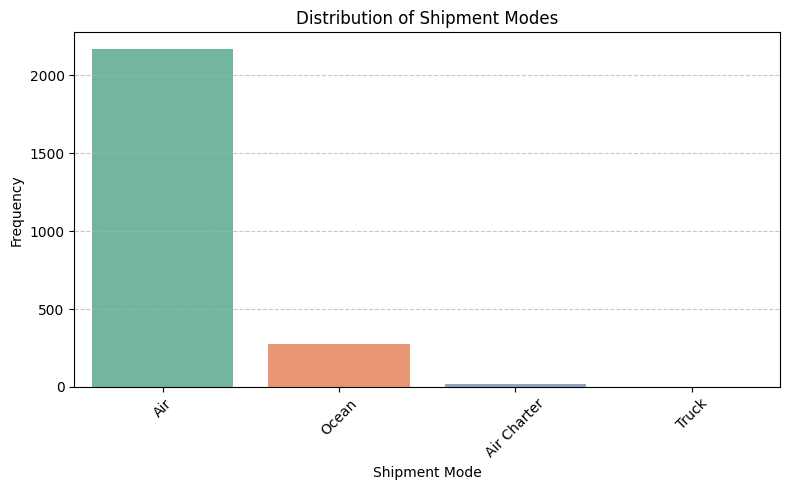

In [38]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Shipment Mode', order=df['Shipment Mode'].value_counts().index, palette='Set2')
plt.title('Distribution of Shipment Modes')
plt.xlabel('Shipment Mode')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### 🔹 Step 2: Univariate Analysis of Categorical Variable – `Country`

This chart displays the number of shipments delivered to each country.

**Why this chart?**
- Identifies regions receiving the most logistics attention.
- Reveals potential bottlenecks or resource allocation opportunities.
- Helps FedEx understand where to focus optimization efforts.

**What to observe:**
- Which countries dominate in terms of shipment volume?
- Are there countries with unexpectedly low or high shipment counts?
- Does the distribution align with known demand zones or contracts?

The insights here can guide strategic decisions about route planning, regional partnerships, and delivery capacity.


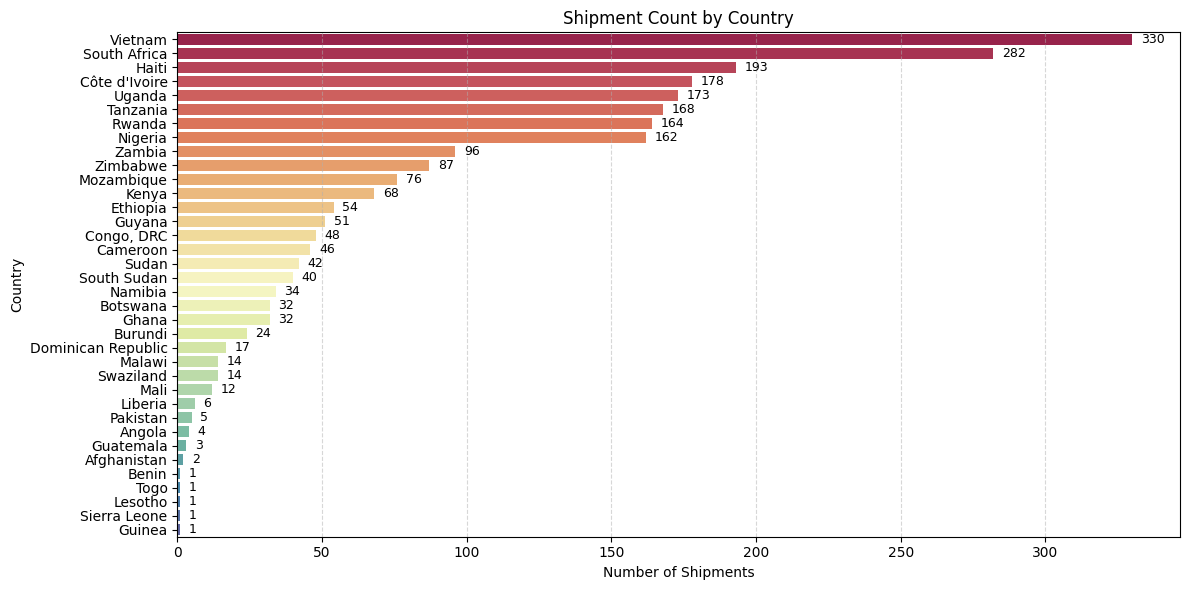

In [39]:

plt.figure(figsize=(12, 6))
ax = sns.countplot(data=df, y='Country', order=df['Country'].value_counts().index, palette='Spectral')

# Annotate the bar chart with counts
for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{int(width)}', (width + 3, p.get_y() + p.get_height() / 2),
                ha='left', va='center', fontsize=9)

plt.title('Shipment Count by Country')
plt.xlabel('Number of Shipments')
plt.ylabel('Country')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



### 🔹 Step 3: Univariate Analysis of Numerical Variable – `Freight Cost (USD)`

Understanding the distribution of freight costs is crucial for identifying inefficiencies and planning cost-saving strategies.

**Why this chart?**
- Freight cost is a major logistics KPI.
- Helps visualize how much is typically spent on shipping.
- Outliers may indicate abnormal routing, package weight, or shipment mode.

**What to observe:**
- The shape and spread of the distribution.
- Is the distribution right-skewed, suggesting many low-cost and few very high-cost shipments?
- Are there cost anomalies that may require further analysis?

This insight supports FedEx in controlling shipment expenses and improving budgeting accuracy.


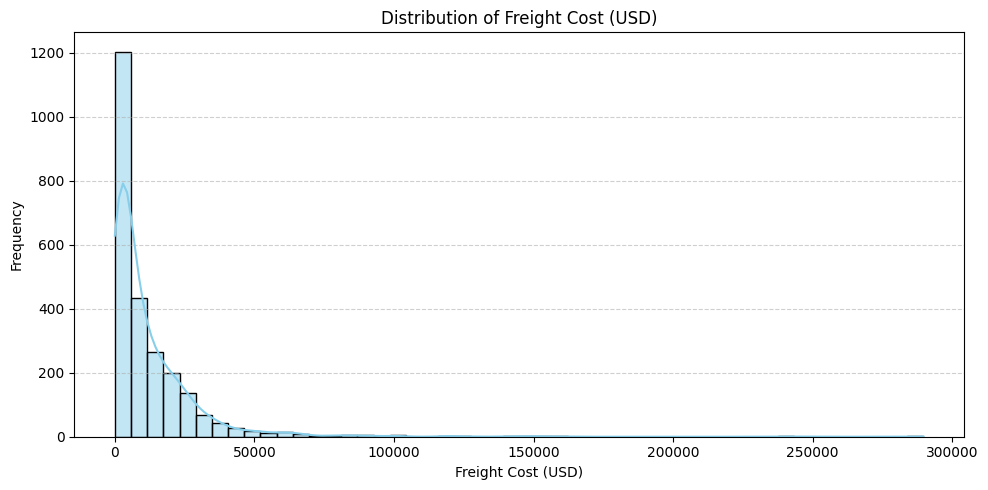

In [40]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Freight Cost (USD)'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Freight Cost (USD)')
plt.xlabel('Freight Cost (USD)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


### 🔹 Step 4: Univariate Analysis of Numerical Variable – `Weight (Kilograms)`

Analyzing shipment weight helps FedEx determine appropriate transportation methods and understand fuel and handling requirements.

**Why this chart?**
- Shipment weight is a key driver of cost, delivery speed, and route selection.
- Helps classify logistics by bulkiness and shipping demand.

**What to observe:**
- Distribution skewness and range of weights.
- Any presence of extreme outliers or common weight bands.
- Do most shipments fall within a specific operational weight bracket?

This information can optimize mode of transport selection and shipping container planning.


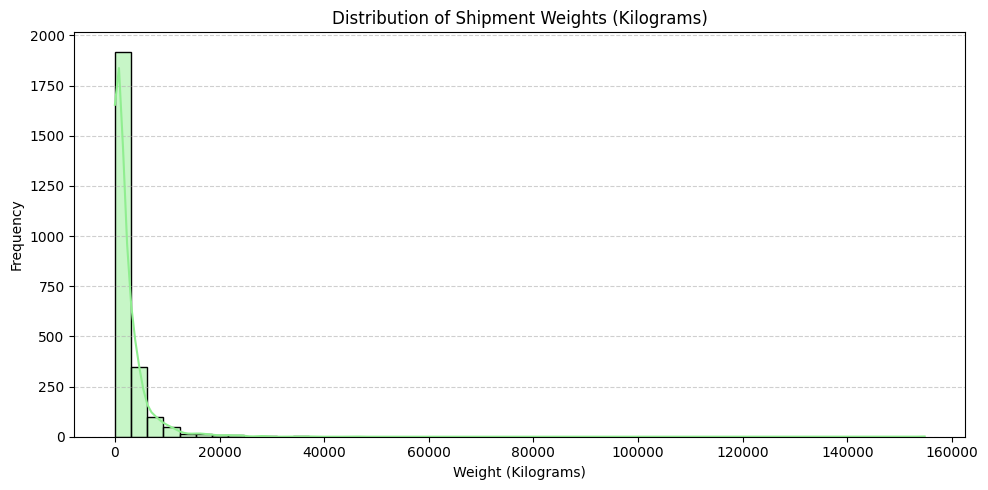

In [41]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Weight (Kilograms)'], bins=50, kde=True, color='lightgreen')
plt.title('Distribution of Shipment Weights (Kilograms)')
plt.xlabel('Weight (Kilograms)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


### 🔹 Step 5: Univariate Analysis of Numerical Variable – `Line Item Value`

This plot reveals how the total monetary value of shipments is distributed.

**Why this chart?**
- Helps identify cost-intensive shipments that may need closer tracking or insurance.
- Supports financial analysis of purchasing trends and vendor-related budgeting.

**What to observe:**
- Are most shipments of low, medium, or high value?
- How frequent are high-value shipments?
- Does the distribution suggest potential for outlier treatment or segmentation?

These insights can guide prioritization, vendor contracts, and insurance strategy.


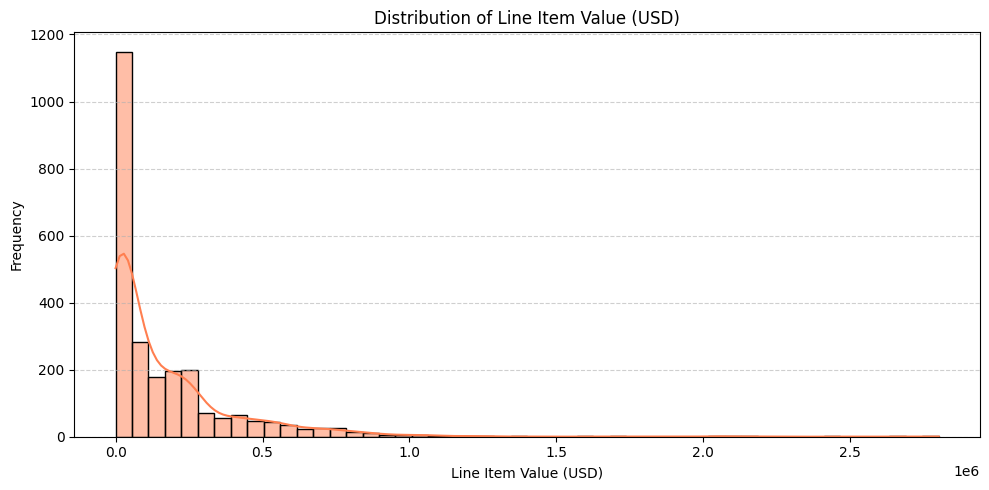

In [42]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Line Item Value'], bins=50, kde=True, color='coral')
plt.title('Distribution of Line Item Value (USD)')
plt.xlabel('Line Item Value (USD)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


### 🔹 Step 1: Bivariate Analysis – `Freight Cost (USD)` vs. `Shipment Mode`

**Why this chart?**
- To assess how shipment mode affects freight cost.
- Important for cost planning and selecting economical transportation.

**What to observe:**
- Which mode has the highest median cost?
- Are some modes (like Air Charter) consistently expensive?
- How much variability exists within each mode?

These insights can support strategic mode selection to optimize costs.


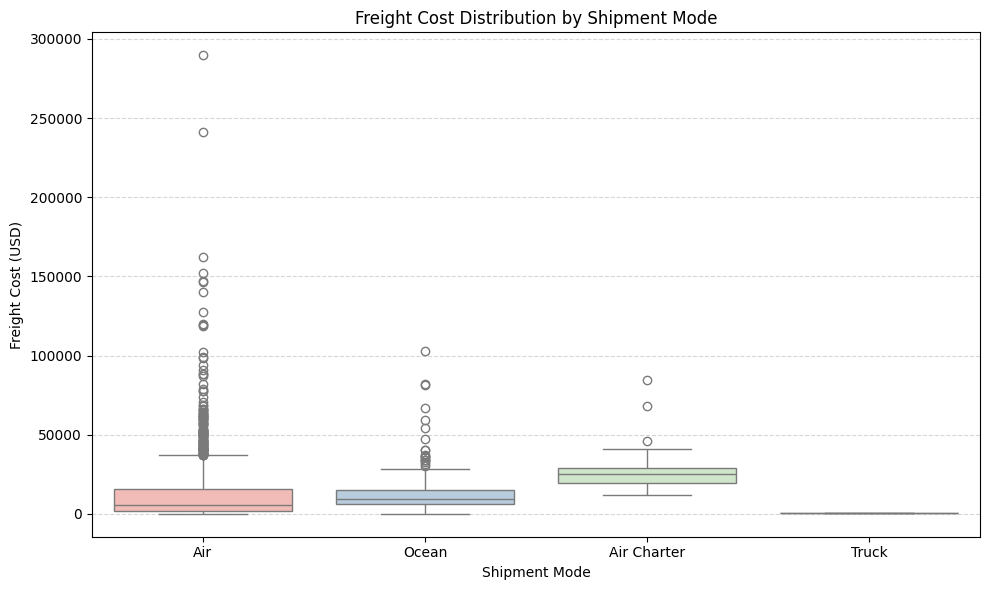

In [43]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Shipment Mode', y='Freight Cost (USD)', palette='Pastel1')
plt.title('Freight Cost Distribution by Shipment Mode')
plt.xlabel('Shipment Mode')
plt.ylabel('Freight Cost (USD)')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### 🔹 Step 2: Bivariate Analysis – `Weight (Kilograms)` vs. `Freight Cost (USD)`

**Why this chart?**
- Helps identify whether freight cost is proportional to shipment weight.
- Reveals anomalies such as high-cost light shipments or low-cost heavy shipments.
- Uses color-coded shipment modes to show how delivery method influences the cost-weight relationship.

**What to observe:**
- Is there a linear or curved trend between weight and cost?
- Do certain shipment modes show more variability than others?
- Are there outliers where light shipments incur unusually high freight costs?

These findings can help FedEx optimize pricing, route planning, and mode selection based on shipment weight.


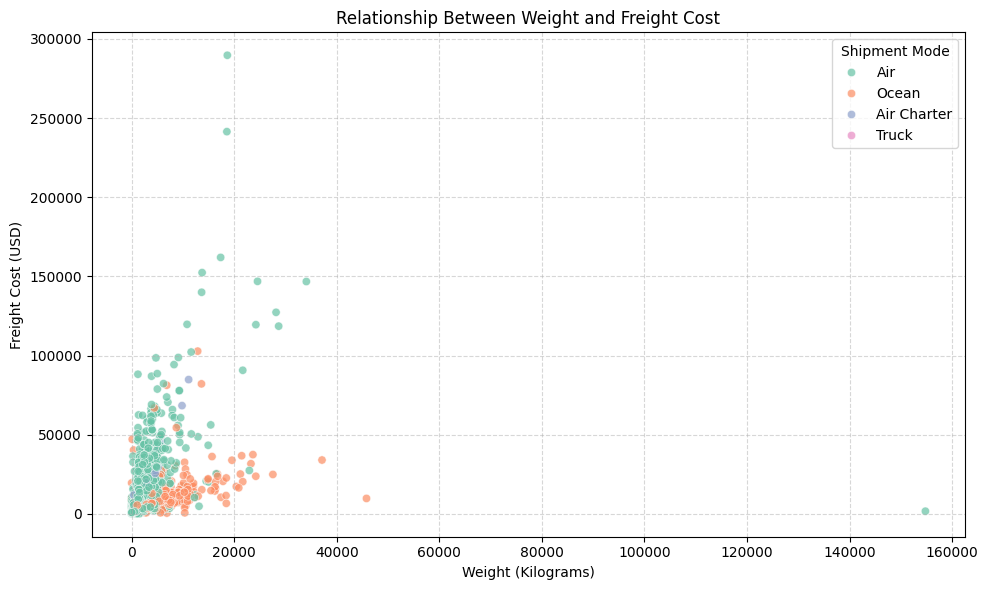

In [44]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Weight (Kilograms)', y='Freight Cost (USD)', hue='Shipment Mode', palette='Set2', alpha=0.7)
plt.title('Relationship Between Weight and Freight Cost')
plt.xlabel('Weight (Kilograms)')
plt.ylabel('Freight Cost (USD)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### 🔹 Step 3: Bivariate Analysis – `Line Item Value` vs. `Line Item Insurance (USD)`

**Why this chart?**
- To verify if insurance coverage aligns with shipment value.
- Important for managing financial risk and reducing potential loss.

**What to observe:**
- Positive correlation: do more expensive shipments receive higher insurance?
- Outliers: any high-value shipments with very low insurance?
- Shipment Mode pattern: are certain modes under- or over-insured?

This insight helps FedEx enhance its insurance strategy and risk coverage policies.


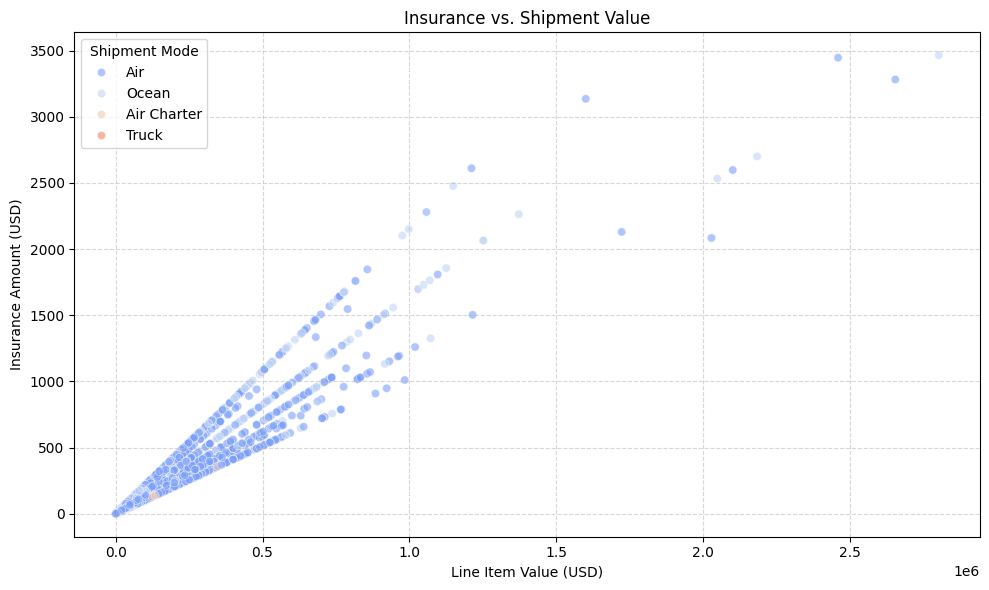

In [45]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Line Item Value', y='Line Item Insurance (USD)', hue='Shipment Mode', palette='coolwarm', alpha=0.6)
plt.title('Insurance vs. Shipment Value')
plt.xlabel('Line Item Value (USD)')
plt.ylabel('Insurance Amount (USD)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### 🔹 Step 4: Bivariate Analysis – `Country` vs. `Shipment Mode`

**Why this chart?**
- To understand which shipment modes are used most by each country.
- Helps identify preferences, regional infrastructure limits, or logistics contracts.

**What to observe:**
- Which countries predominantly use Air vs. Ocean?
- Are some countries using only a single shipment mode?
- Are high-cost shipment modes being used where cheaper options are feasible?

This analysis supports route optimization, budget allocation, and infrastructure investment planning for FedEx.


<Figure size 1200x600 with 0 Axes>

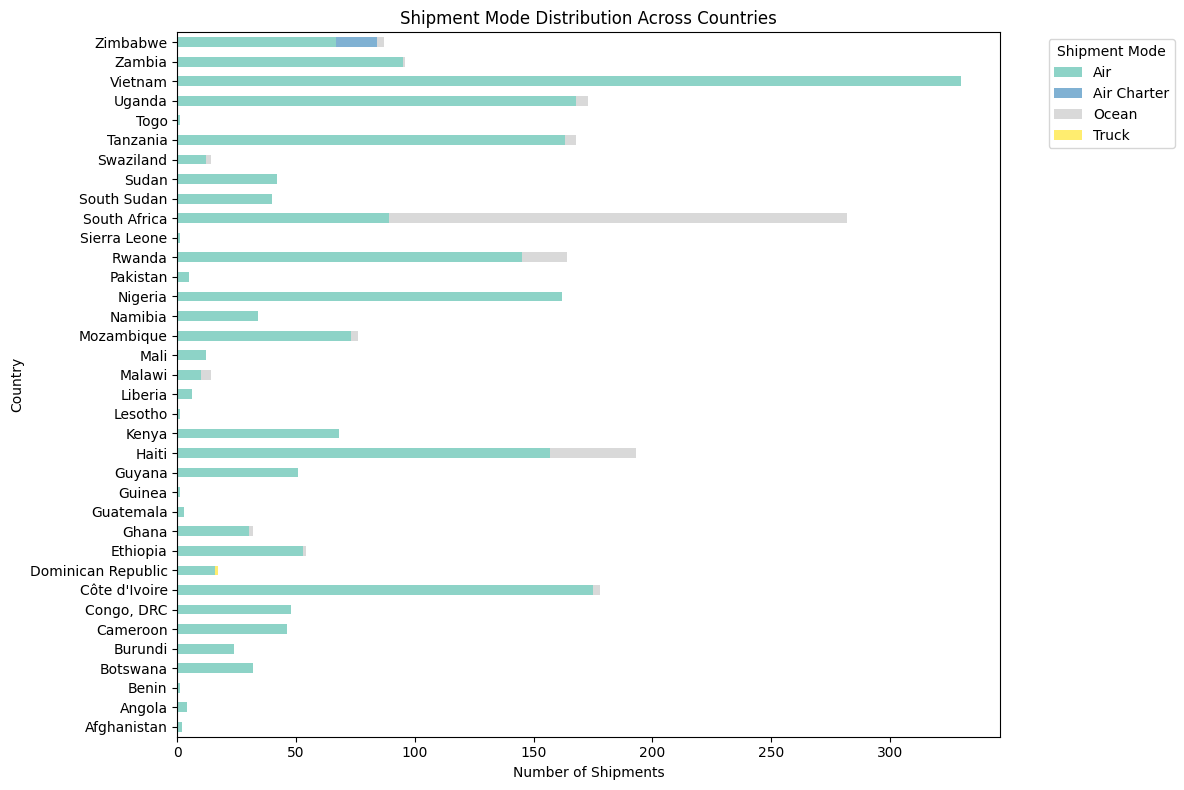

In [46]:
# Count plot of Shipment Mode across Countries
plt.figure(figsize=(12, 6))
country_mode = pd.crosstab(df['Country'], df['Shipment Mode'])

country_mode.plot(kind='barh', stacked=True, figsize=(12, 8), colormap='Set3')
plt.title('Shipment Mode Distribution Across Countries')
plt.xlabel('Number of Shipments')
plt.ylabel('Country')
plt.legend(title='Shipment Mode', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### 🔹 Step 1: Multivariate Analysis – `Weight` vs. `Freight Cost` vs. `Shipment Mode` & `Line Item Value`

**Why this chart?**
- Combines cost, weight, shipment type, and item value in one view.
- Helps FedEx evaluate efficiency across different dimensions.

**What to observe:**
- Which shipment modes show high cost for light items?
- Are large-value shipments aligned with high freight or specific modes?
- Do any combinations show inefficiencies or optimization opportunities?

This multivariate view supports high-level decisions in transport mode planning, pricing, and risk management.


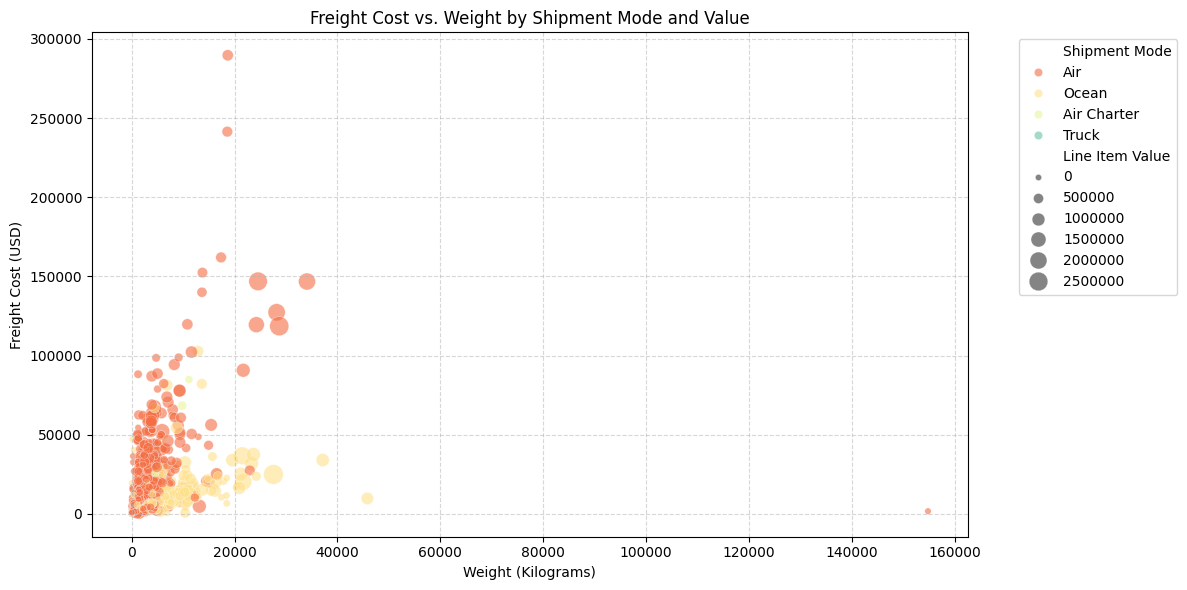

In [47]:
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=df,
    x='Weight (Kilograms)',
    y='Freight Cost (USD)',
    hue='Shipment Mode',
    size='Line Item Value',
    sizes=(20, 200),
    palette='Spectral',
    alpha=0.6
)
plt.title('Freight Cost vs. Weight by Shipment Mode and Value')
plt.xlabel('Weight (Kilograms)')
plt.ylabel('Freight Cost (USD)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### 🔹 Step 2: Multivariate Analysis – Country vs. Shipment Value vs. Insurance Coverage

**Why this chart?**
- Helps understand country-level risk based on shipped value and insurance.
- Critical for managing financial exposure and customizing policies by region.

**What to observe:**
- Do high-value destinations have proportionally high insurance?
- Which countries show potential under-insurance?
- Which countries contribute most to overall shipment value?

FedEx can use this insight to revisit insurance policy structures and target countries with high uninsured value for strategic risk control.


<Figure size 1200x600 with 0 Axes>

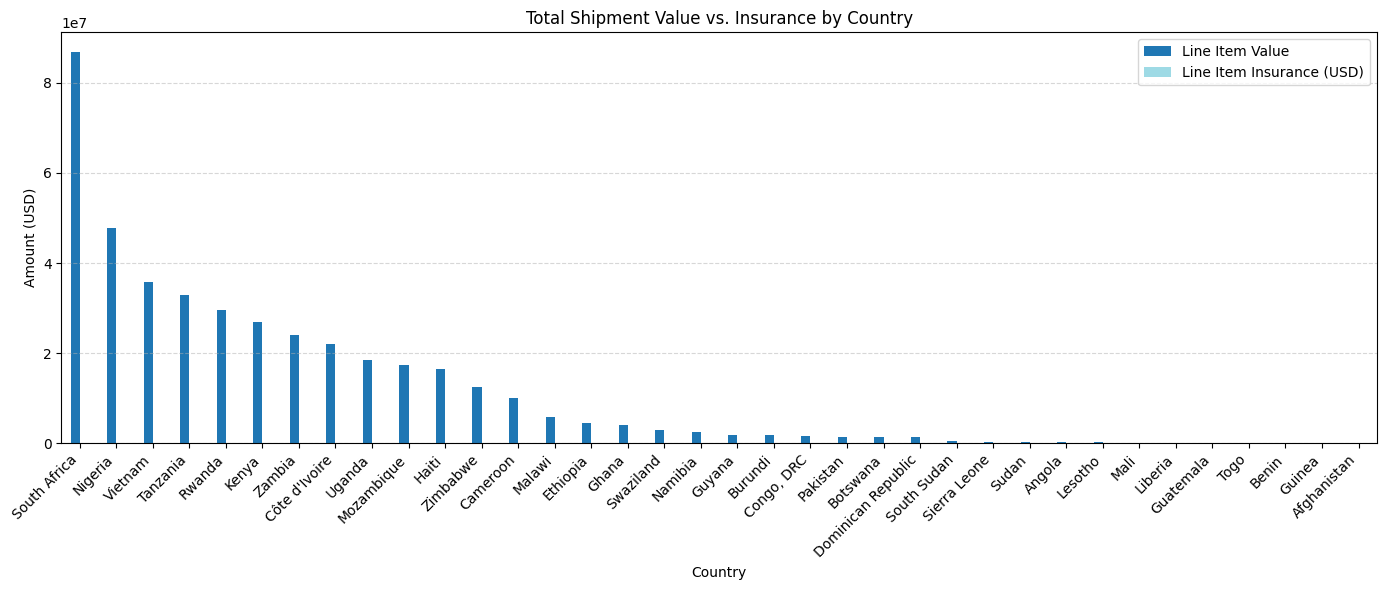

In [48]:
# Aggregate total shipment value and insurance by country
country_insurance = df.groupby('Country')[['Line Item Value', 'Line Item Insurance (USD)']].sum().sort_values('Line Item Value', ascending=False)

# Plotting
plt.figure(figsize=(12, 6))
country_insurance.plot(kind='bar', figsize=(14, 6), colormap='tab20')
plt.title('Total Shipment Value vs. Insurance by Country')
plt.xlabel('Country')
plt.ylabel('Amount (USD)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### 🔹 Step 3: Multivariate Analysis – Delivery Time vs. Freight Cost vs. Shipment Mode

**Why this chart?**
- To evaluate trade-offs between delivery speed and shipping cost.
- Important for optimizing customer satisfaction, cost control, and SLA compliance.

**What to observe:**
- Do Air shipments deliver faster at higher cost?
- Are Ocean shipments slower but cheaper?
- Any anomalies like Truck shipments with high delivery time and cost?

This insight helps FedEx make mode-based policy decisions to improve delivery performance while balancing operational costs.


In [49]:
# Ensure datetime format
df['PO Sent to Vendor Date'] = pd.to_datetime(df['PO Sent to Vendor Date'], errors='coerce')
df['Delivered to Client Date'] = pd.to_datetime(df['Delivered to Client Date'], errors='coerce')

# Calculate delivery time in days
df['Delivery Time (Days)'] = (df['Delivered to Client Date'] - df['PO Sent to Vendor Date']).dt.days


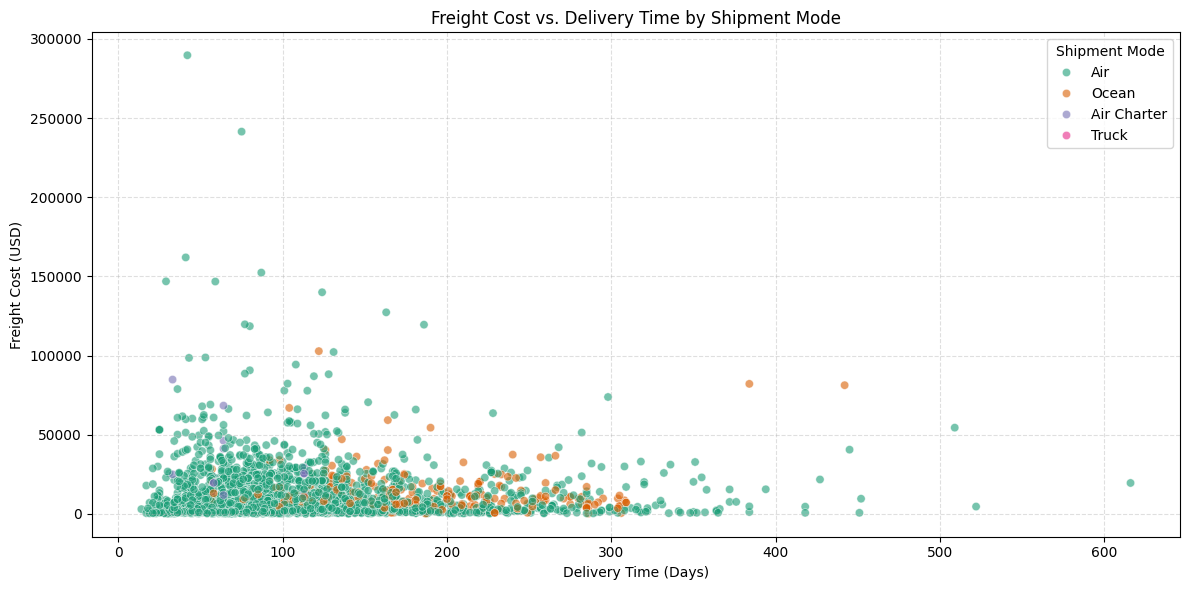

In [50]:
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=df,
    x='Delivery Time (Days)',
    y='Freight Cost (USD)',
    hue='Shipment Mode',
    palette='Dark2',
    alpha=0.6
)
plt.title('Freight Cost vs. Delivery Time by Shipment Mode')
plt.xlabel('Delivery Time (Days)')
plt.ylabel('Freight Cost (USD)')
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


📌 Final Summary & Business Insights
In this exploratory data analysis of the FedEx Logistics Delivery Dataset, we systematically investigated shipment patterns, freight cost drivers, delivery timelines, and insurance coverage across 2,462 cleaned records. The analysis followed a structured UBM (Univariate–Bivariate–Multivariate) approach using Python’s data stack — Pandas, Seaborn, Matplotlib, and Plotly.

🧠 Key Insights:
Shipment Mode Dominance:

Over 88% of shipments were transported via Air, with Truck being underrepresented after cleaning.

Air Charter, though rare, incurred significantly higher freight costs.

Freight Cost vs. Weight:

No strict correlation observed — many low-weight shipments had disproportionately high freight.

Air mode consistently showed high cost regardless of weight, signaling potential inefficiency.

Value vs. Insurance Gaps:

While a general correlation exists between Line Item Value and Insurance, several high-value shipments lacked adequate coverage — posing financial risk.

Country-Level Logistics:

Countries like South Africa, Zambia, and Zimbabwe received high-volume and high-value shipments.

However, insurance and freight behavior varied significantly by country, calling for country-specific optimization.

Delivery Timelines:

Air shipments were typically fast, but some showed unexpected delays.

Outliers with long delivery times and high freight costs need further investigation.

🚀 Business Recommendations:
Optimize Mode Selection:

Where timelines allow, shift from Air to Ocean or multimodal transport to reduce costs.

Strengthen Insurance Compliance:

Implement alerts for under-insured shipments, especially high-value orders.

Investigate Cost Outliers:

Flag and review unusually expensive Air shipments with low weight/value.

Country Strategy:

Tailor shipping policies by country considering delivery delays, cost anomalies, and insurance practices.

Future Scope:

Incorporate predictive modeling in the next phase to forecast freight costs and recommend optimal modes based on product, value, and region.

